<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/3_3_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_AND%EC%97%B0%EC%82%B0(%ED%8C%8C%EC%9D%B4%EC%8D%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

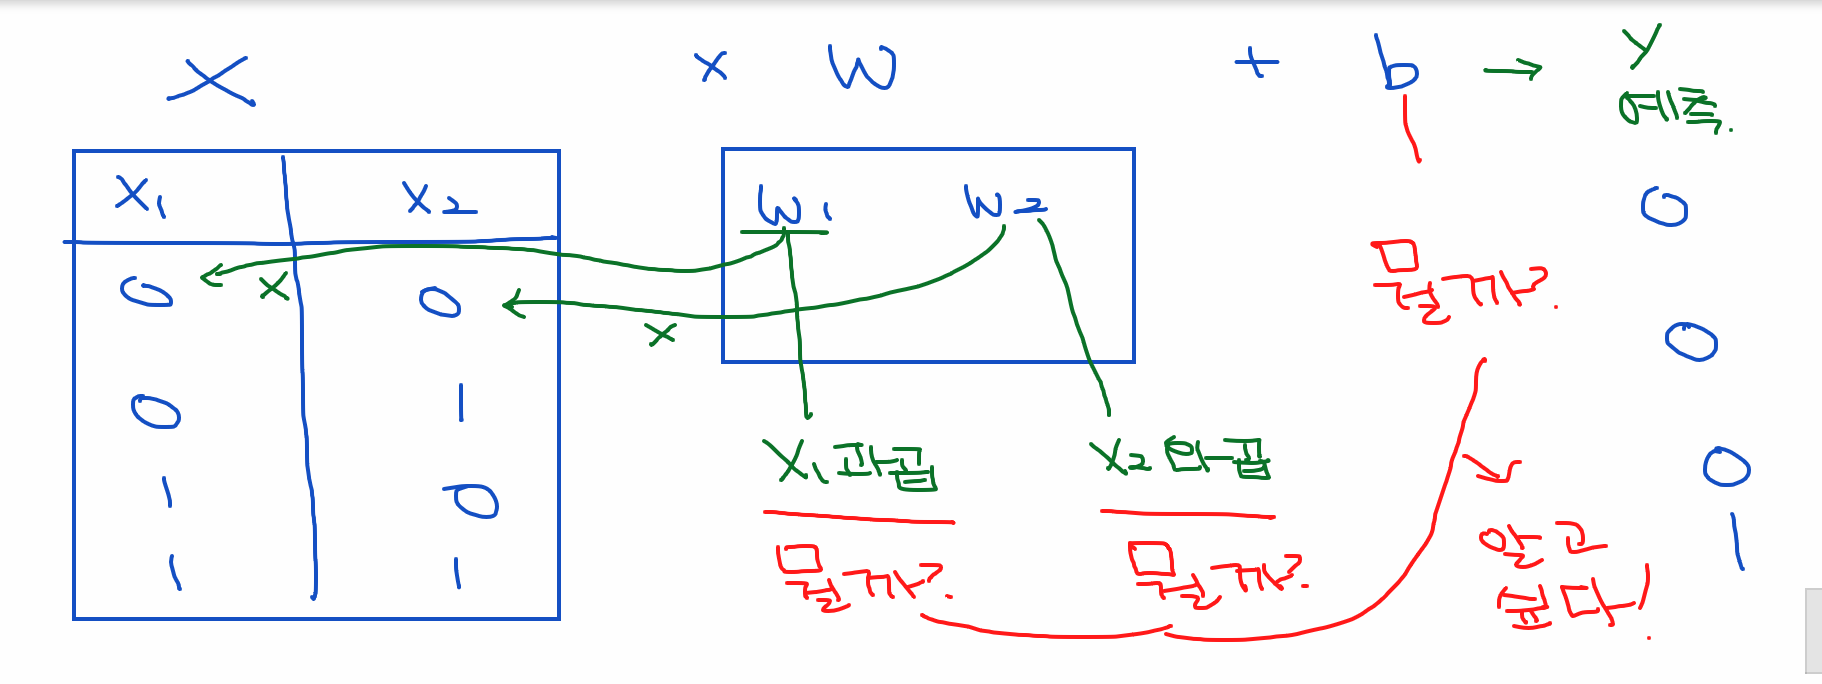

In [69]:
import numpy as np

In [70]:
X = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [1, 1]
              ])

In [71]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [72]:
y = np.array([
              [0],
              [0],
              [0],
              [1]
])

In [73]:
y

array([[0],
       [0],
       [0],
       [1]])

In [74]:
w = np.array(
    [
     [1],
     [2]
    ]
)

In [75]:
w

array([[1],
       [2]])

In [76]:
b = np.array([3])

In [77]:
b

array([3])

In [78]:
np.dot(X, w)

array([[0],
       [2],
       [1],
       [3]])

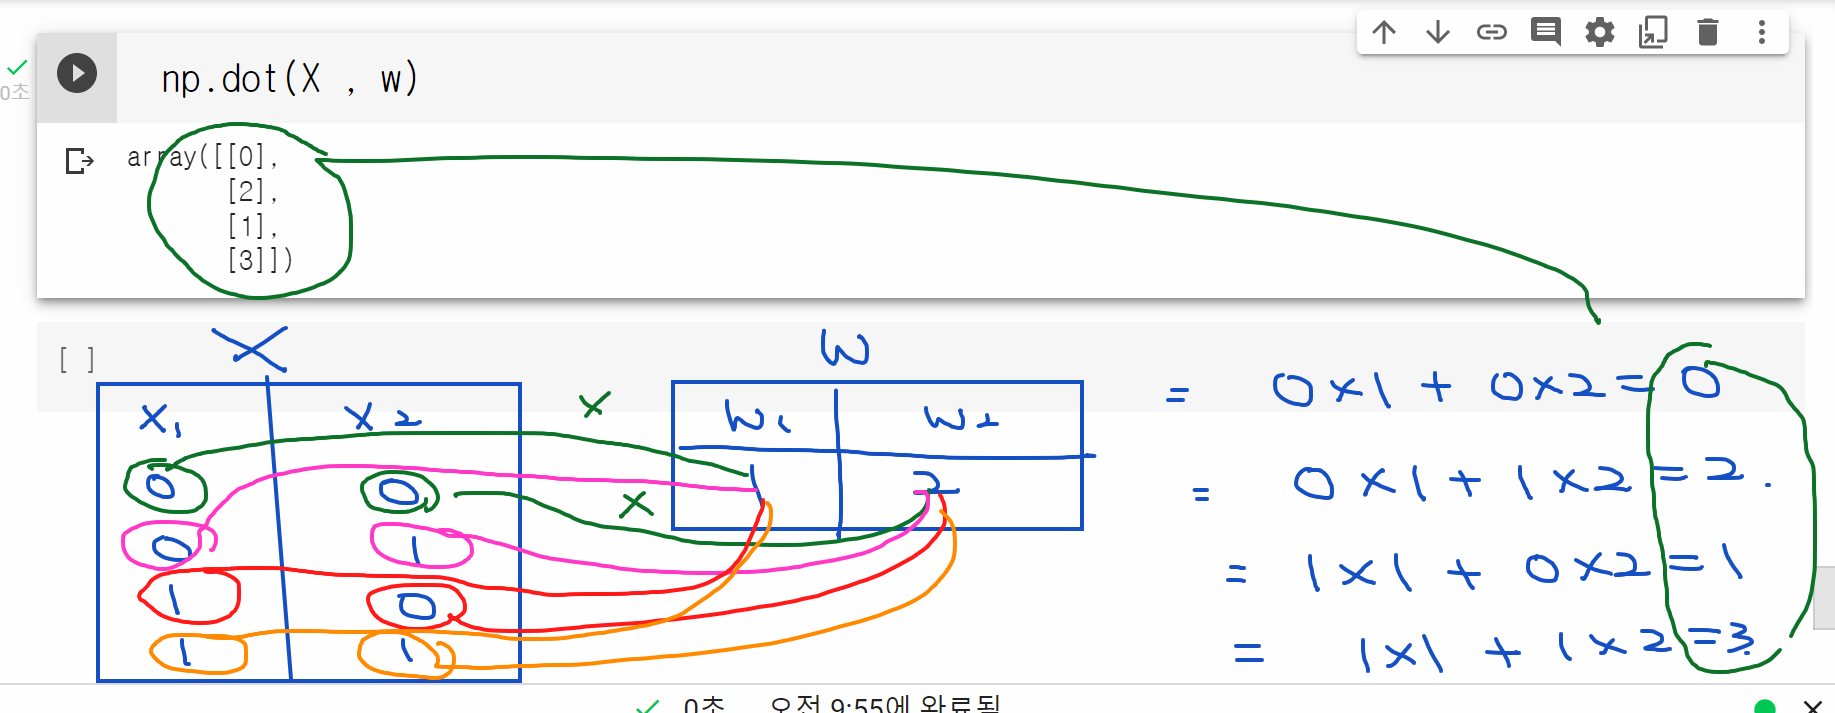

In [79]:
np.dot(X, w) + b

array([[3],
       [5],
       [4],
       [6]])

In [80]:
hypothesis = np.dot(X, w) + b

In [81]:
hypothesis

array([[3],
       [5],
       [4],
       [6]])

- 3,4,5,6을 0,1로 바꾸는 뭔가가 필요함 -> 활성화 함수(Sigmoid, Softmax, Relu 등)

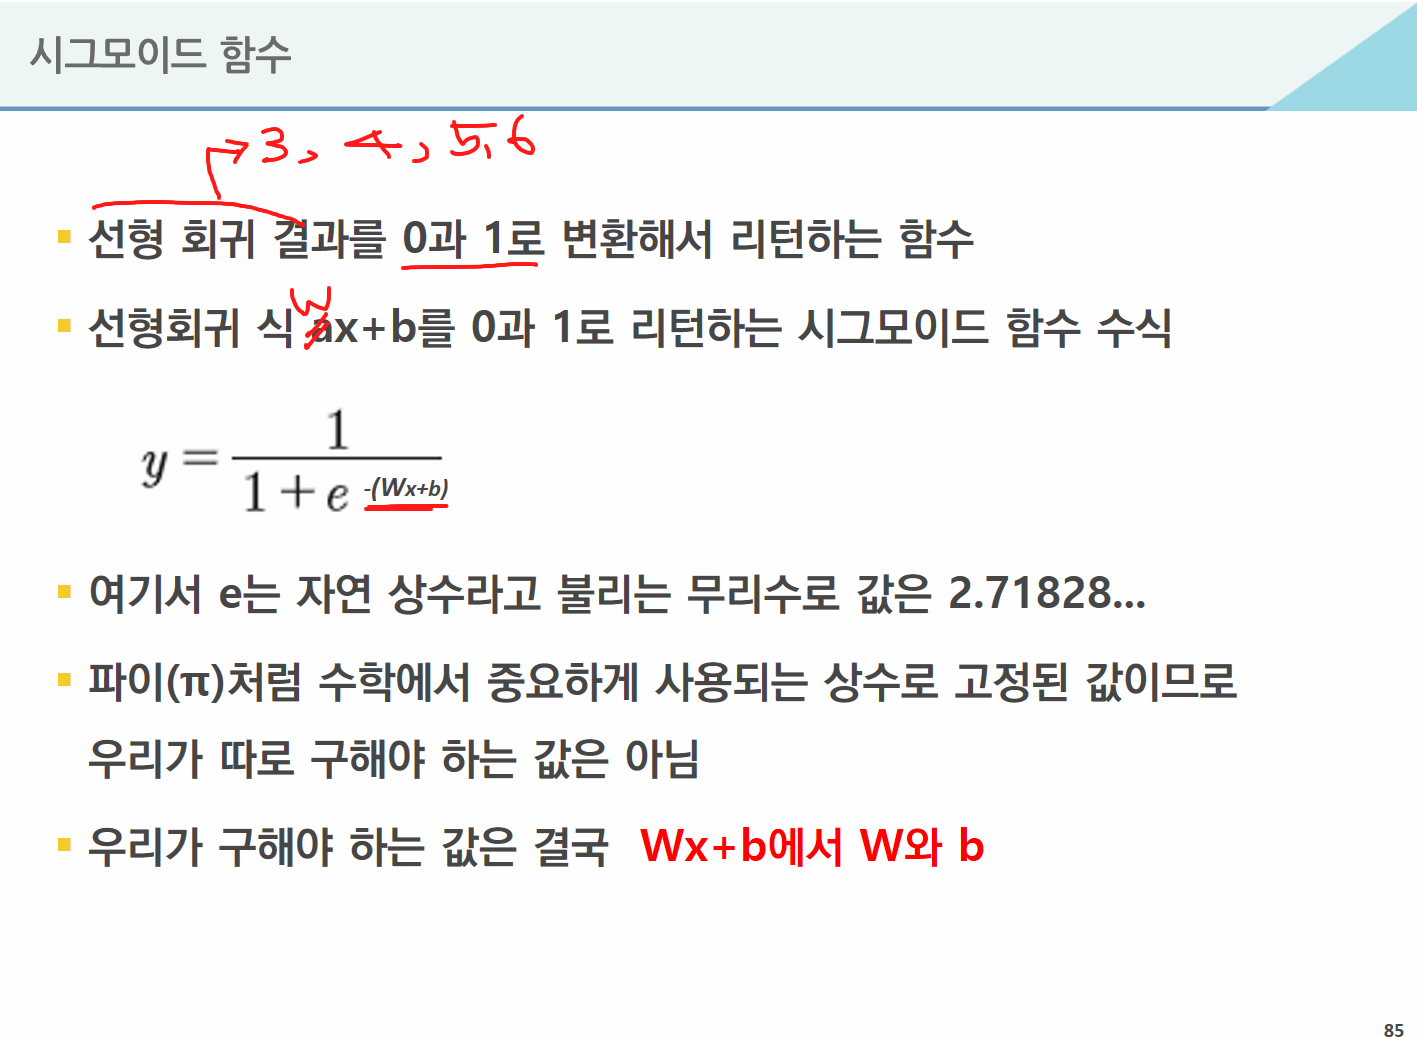

In [82]:
from math import e

In [83]:
e        # 자연상수

2.718281828459045

In [84]:
e ** -1       # 자연상수 e의 -1승

0.36787944117144233

In [85]:
e ** 0

1.0

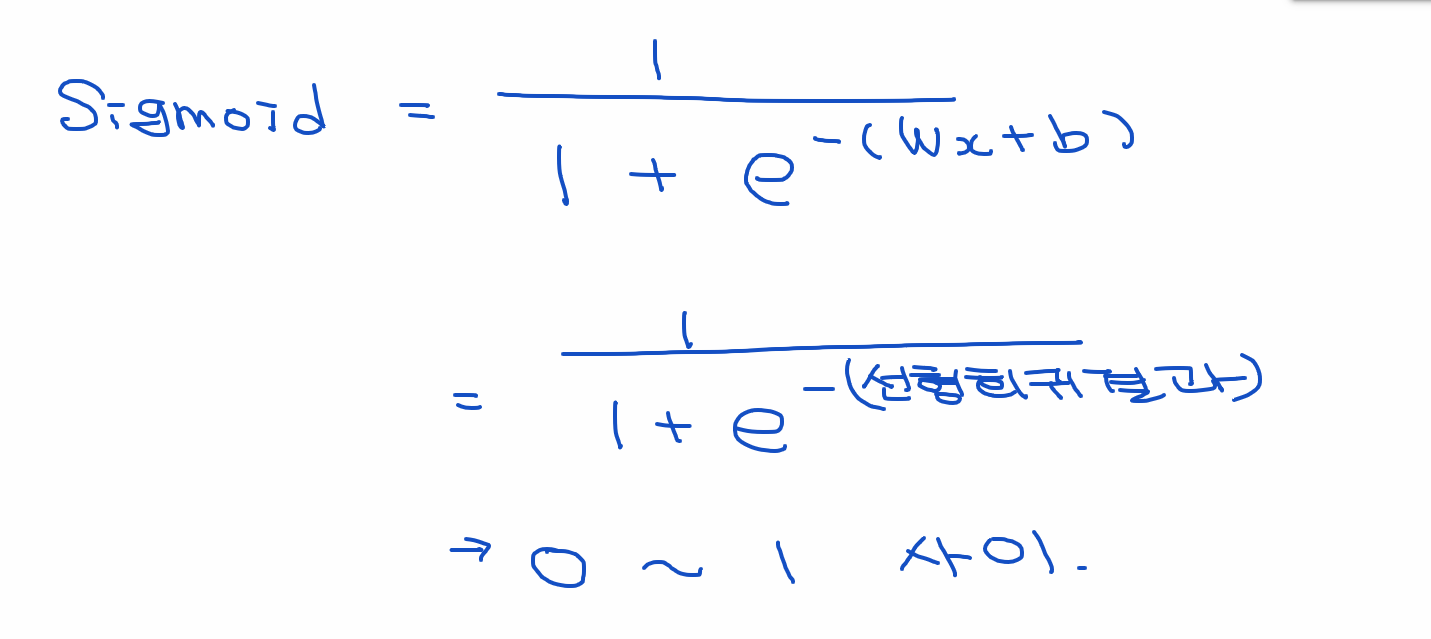

선형회귀한 결과가 -5일 때 Sigmoid로 0~1로 바꾸면

1 / ( 1+(e**-(-5)) ) = 0.006

In [86]:
1 / ( 1 + e**-(-5) )

0.006692850924284857

선형회귀 (wx + b = -2.5)일 때 Sigmoid로 0~1 변환하면

1 / ( 1 + e**-(-2.5) ) = 0.075

In [87]:
1 / ( 1+ e**-(-2.5) )

0.07585818002124356

선형회귀 (wx + b = -2.5)일 때 Sigmoid로 0~1 변환하면

1 / ( 1 + e**-(0) ) = 0.5

In [88]:
1 / ( 1+ e**-0 )

0.5

선형회귀 (wx + b = -2.5)일 때 Sigmoid로 0~1 변환하면

1 / ( 1 + e**-(2.5) ) = 0.92

In [89]:
1 / ( 1+ e**-(2.5) )

0.9241418199787566

선형회귀 (wx + b = -2.5)일 때 Sigmoid로 0~1 변환하면

1 / ( 1 + e**-(5) ) = 0.99

In [90]:
1 / ( 1+ e**-(5) )

0.9933071490757153

# 함수

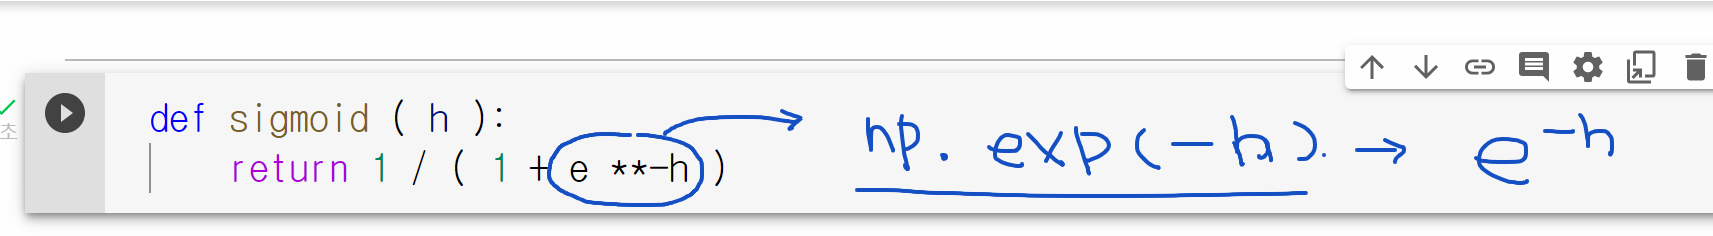

In [91]:
def sigmoid ( h ):
  return 1 / ( 1 + e ** -h )

In [92]:
def sigmoid ( h ):
  return 1 / ( 1 + np.exp(-h) )

In [93]:
sigmoid(0)

0.5

In [94]:
sigmoid(2.5)

0.9241418199787566

In [95]:
sigmoid(5)

0.9933071490757153

# 시그모이드 함수 그래프

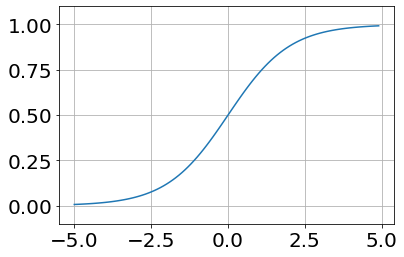

In [96]:
import matplotlib.pylab as plt 

def sigmoid(x):
  return 1/(1+np.exp(-x)) # 시그모이드 수식 
 
x = np.arange(-5.0, 5.0, 0.1) # -5.0 ~ 5.0까지 0.1씩 증가 
Y = sigmoid(x) 

plt.plot(x,Y) 
plt.xticks()
plt.yticks()

plt.ylim(-0.1,1.1) # y축 값의 범위 설정 

plt.tick_params(labelsize=20)
plt.grid(True)
plt.show()

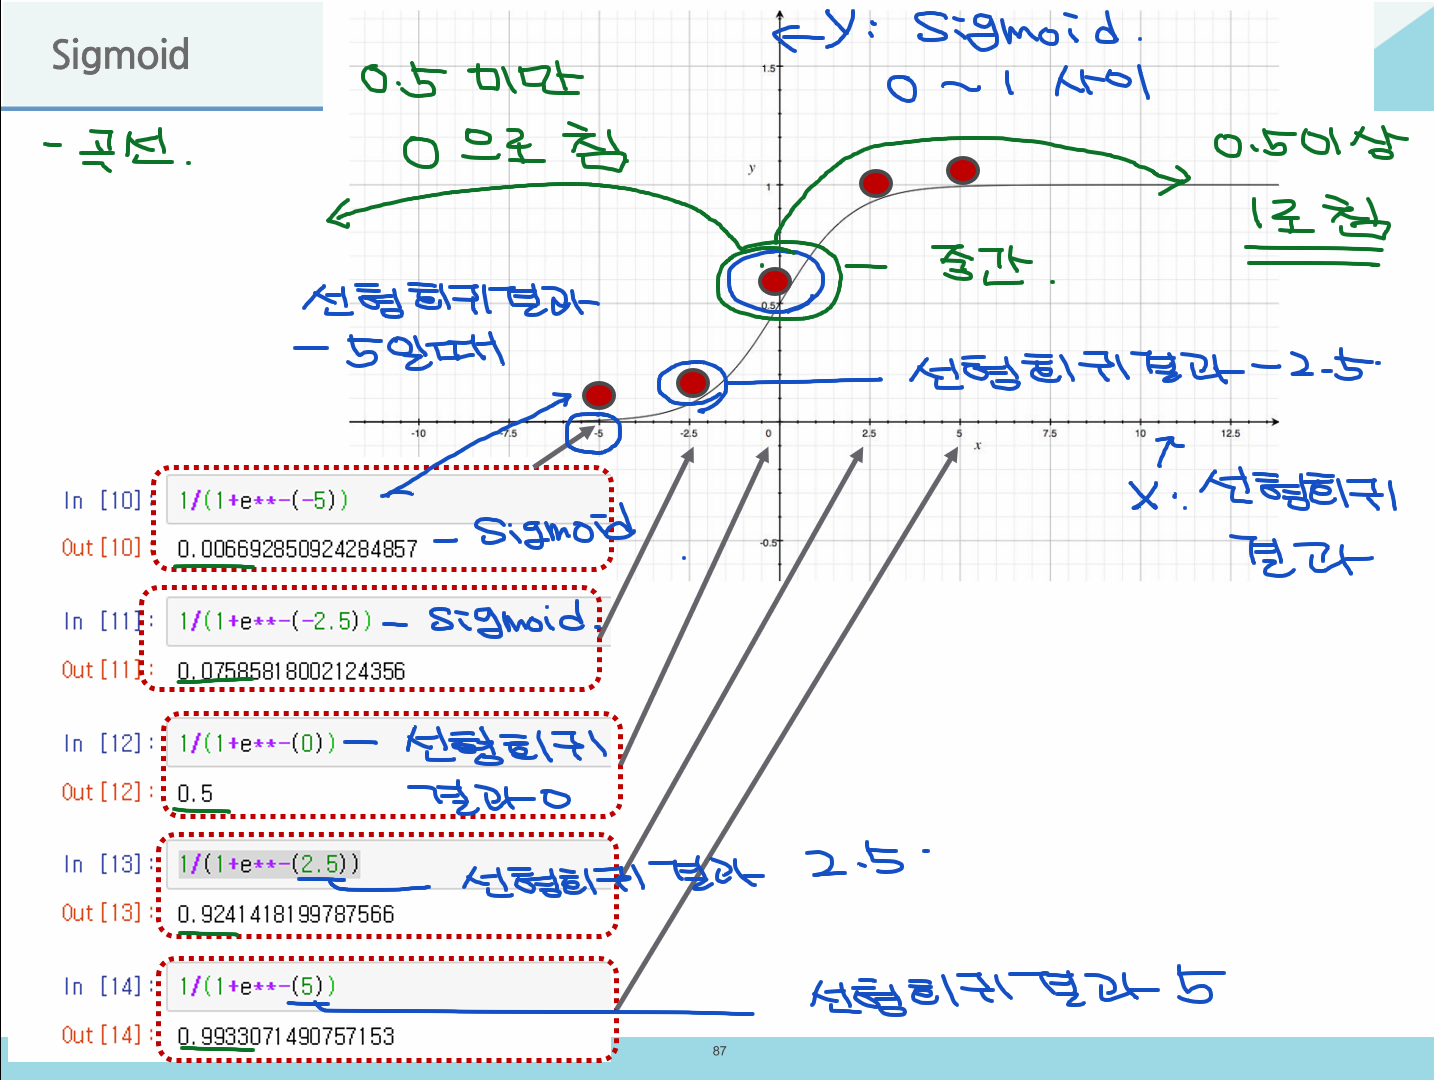

# 시그모이드 적용

In [97]:
sigmoid(hypothesis)

array([[0.95257413],
       [0.99330715],
       [0.98201379],
       [0.99752738]])

# cost 계산
- 회귀일 때 cost = __(예측 - 찐) 제곱의 합__ 나누기 __데이터 수__
- 분류일 때 cost 계산?

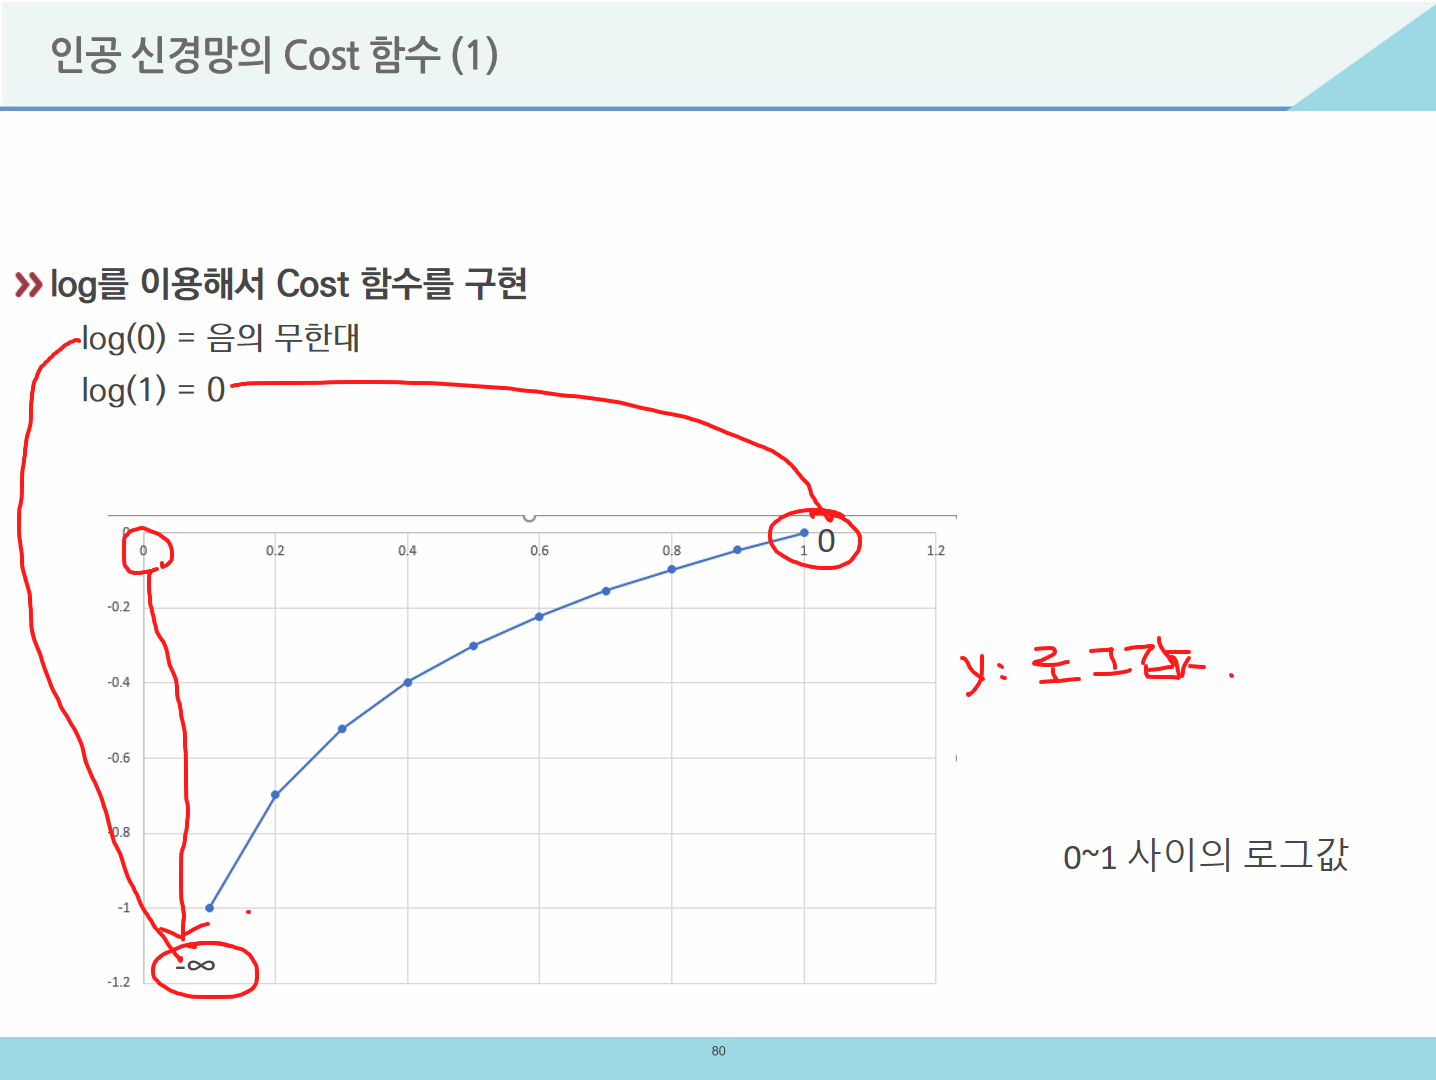

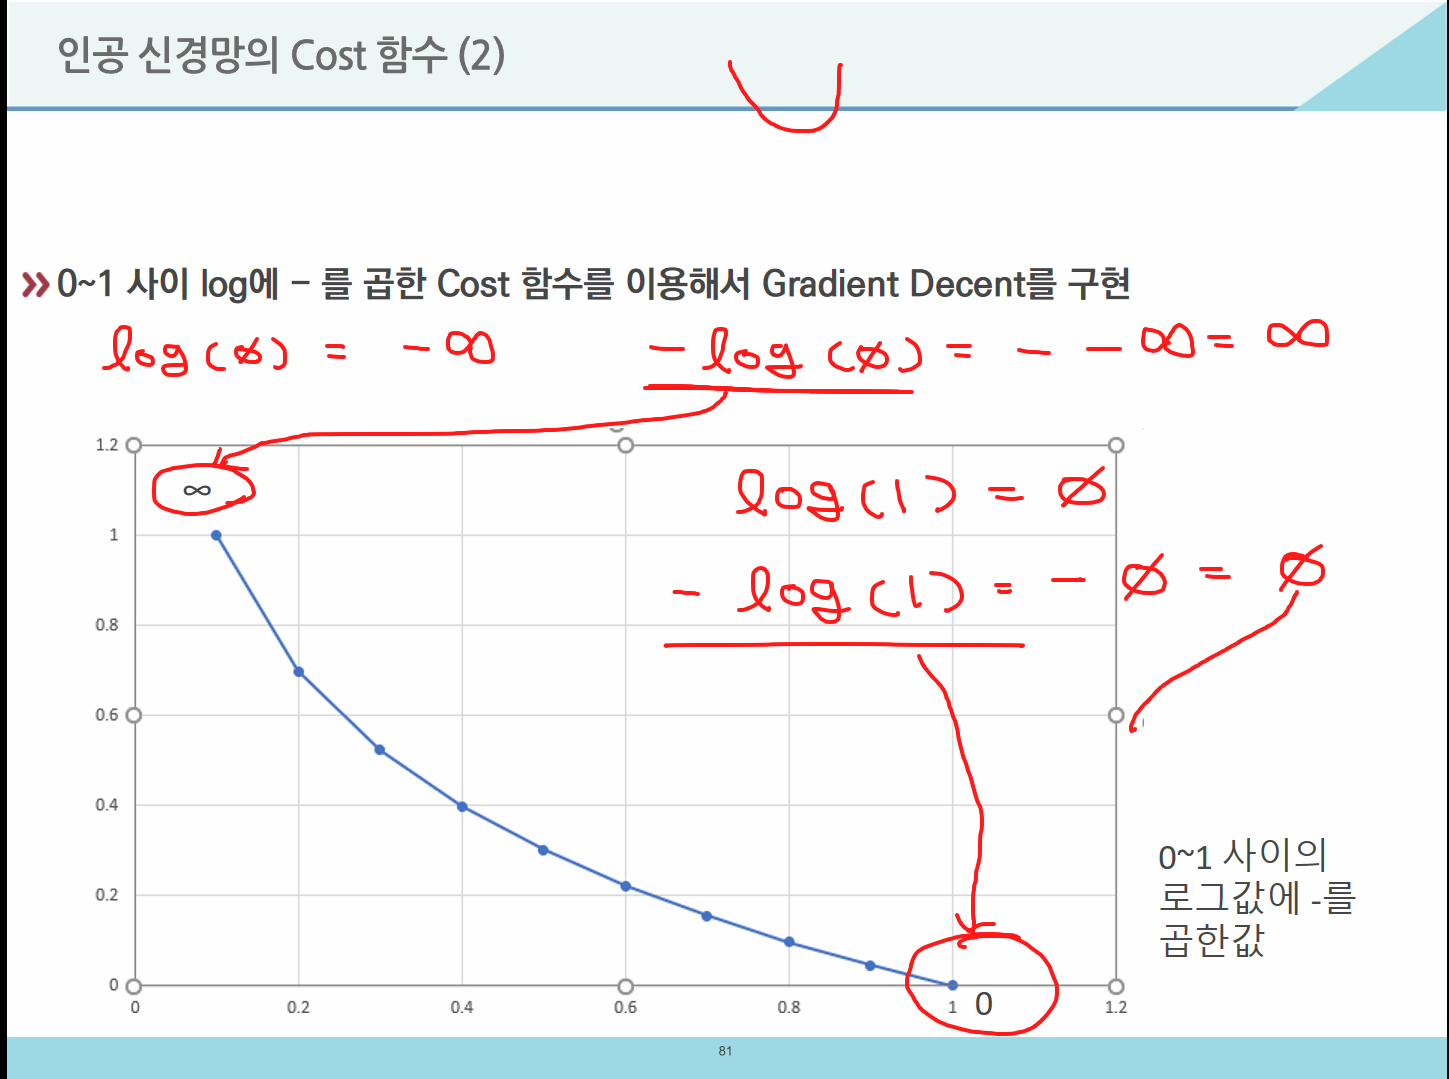

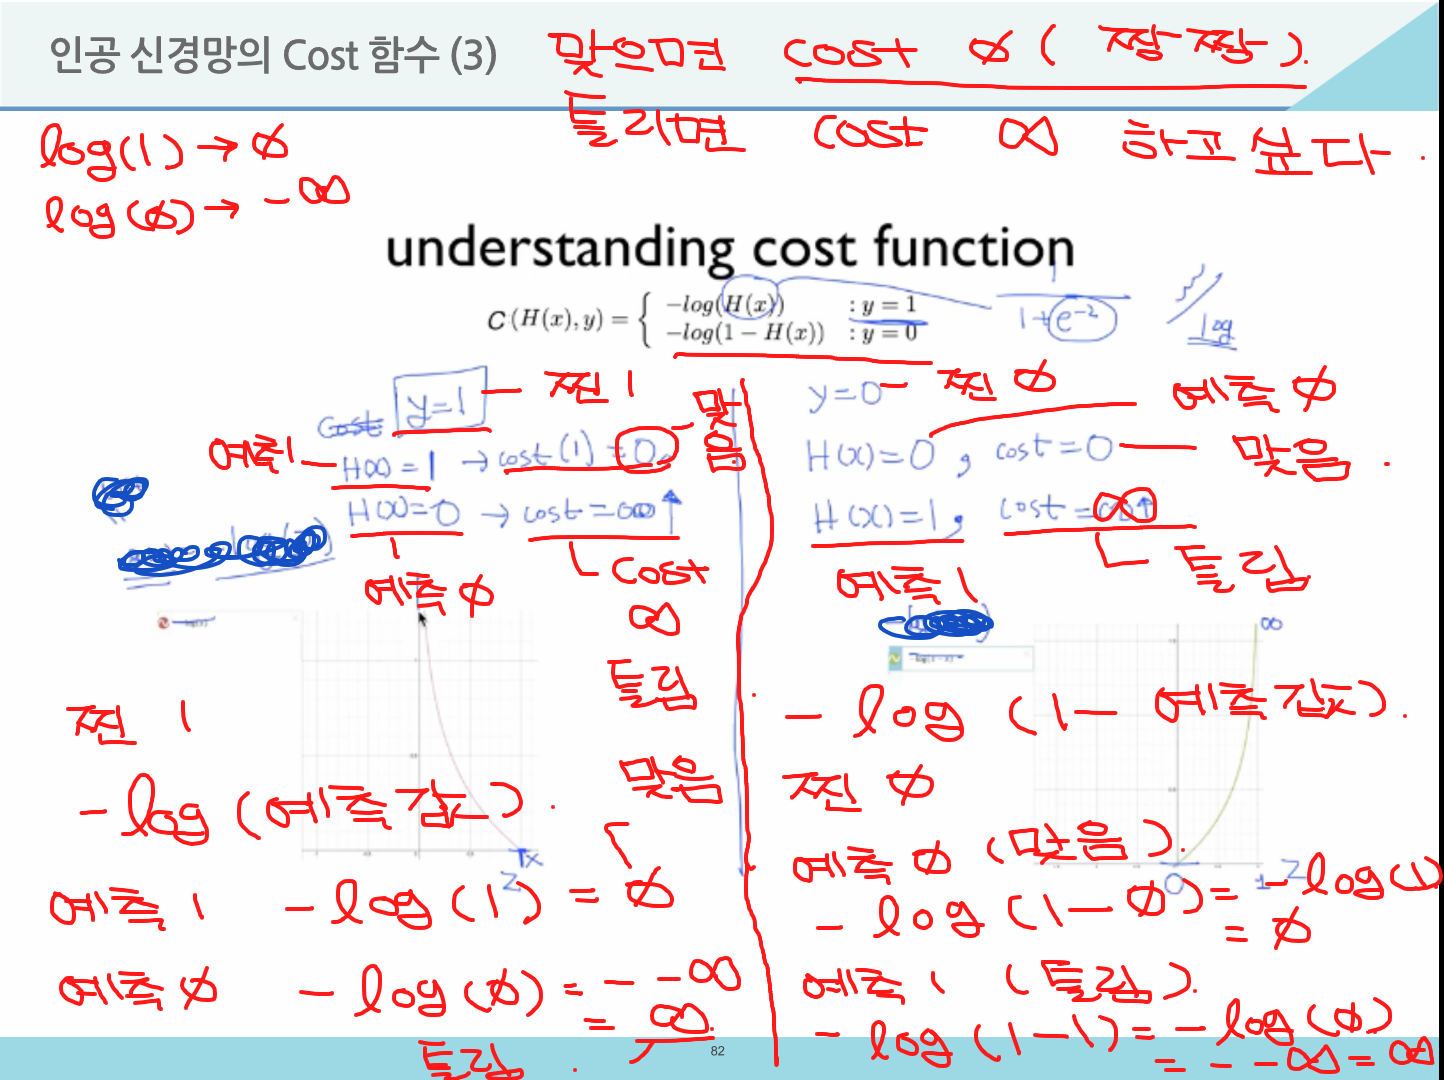

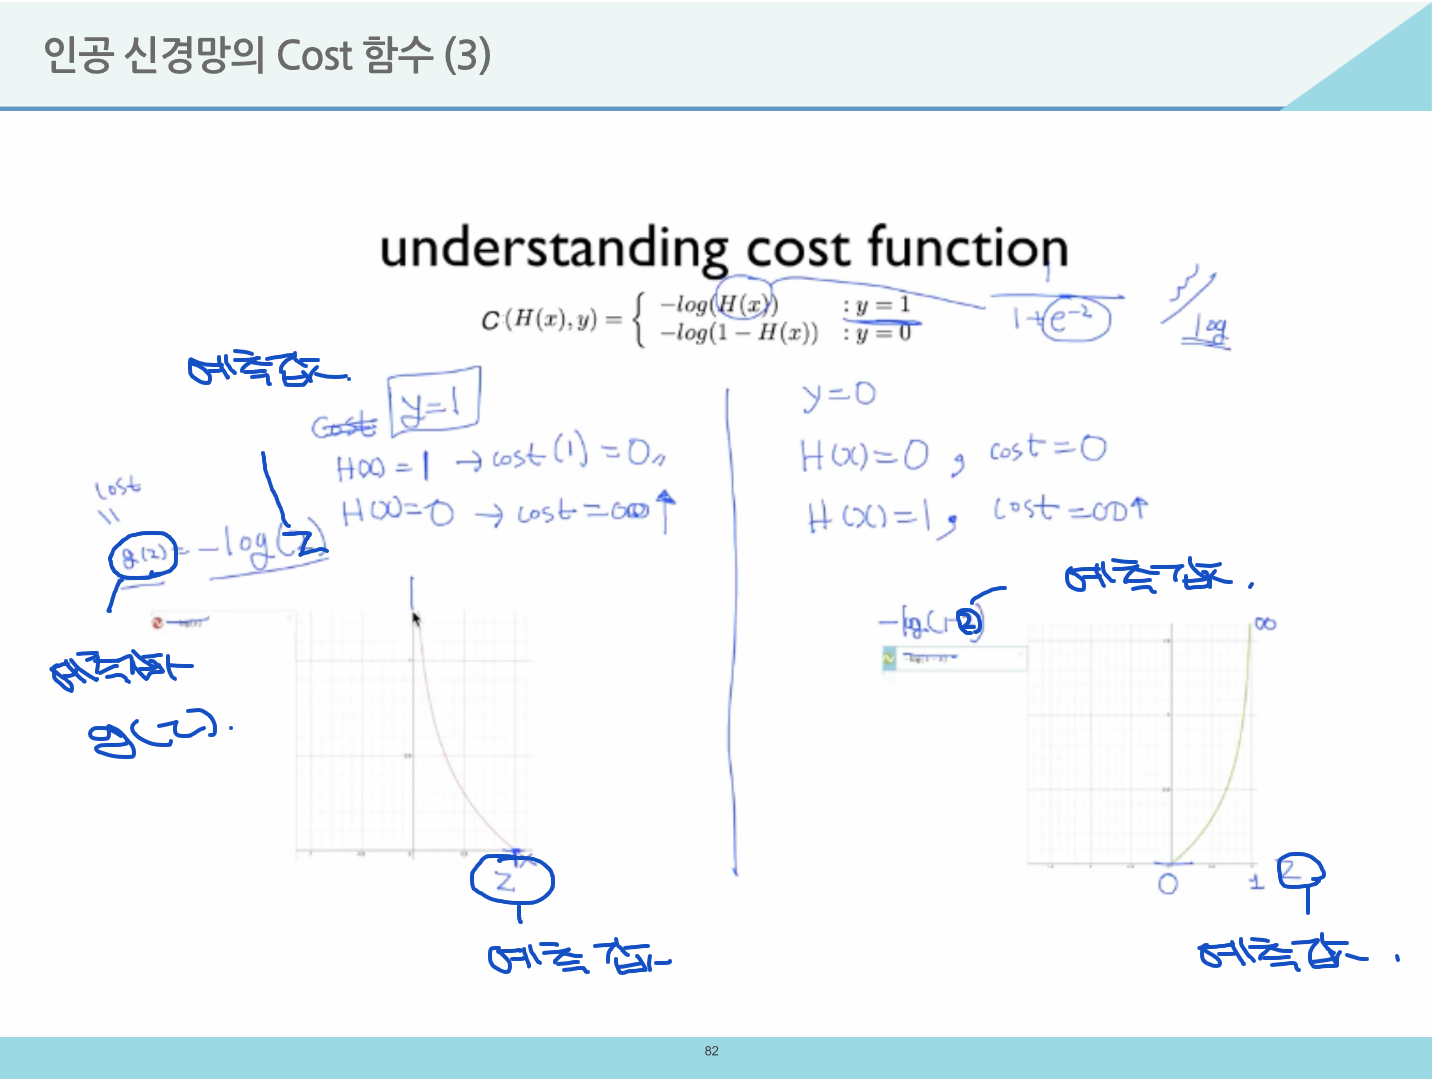

## cost 수식

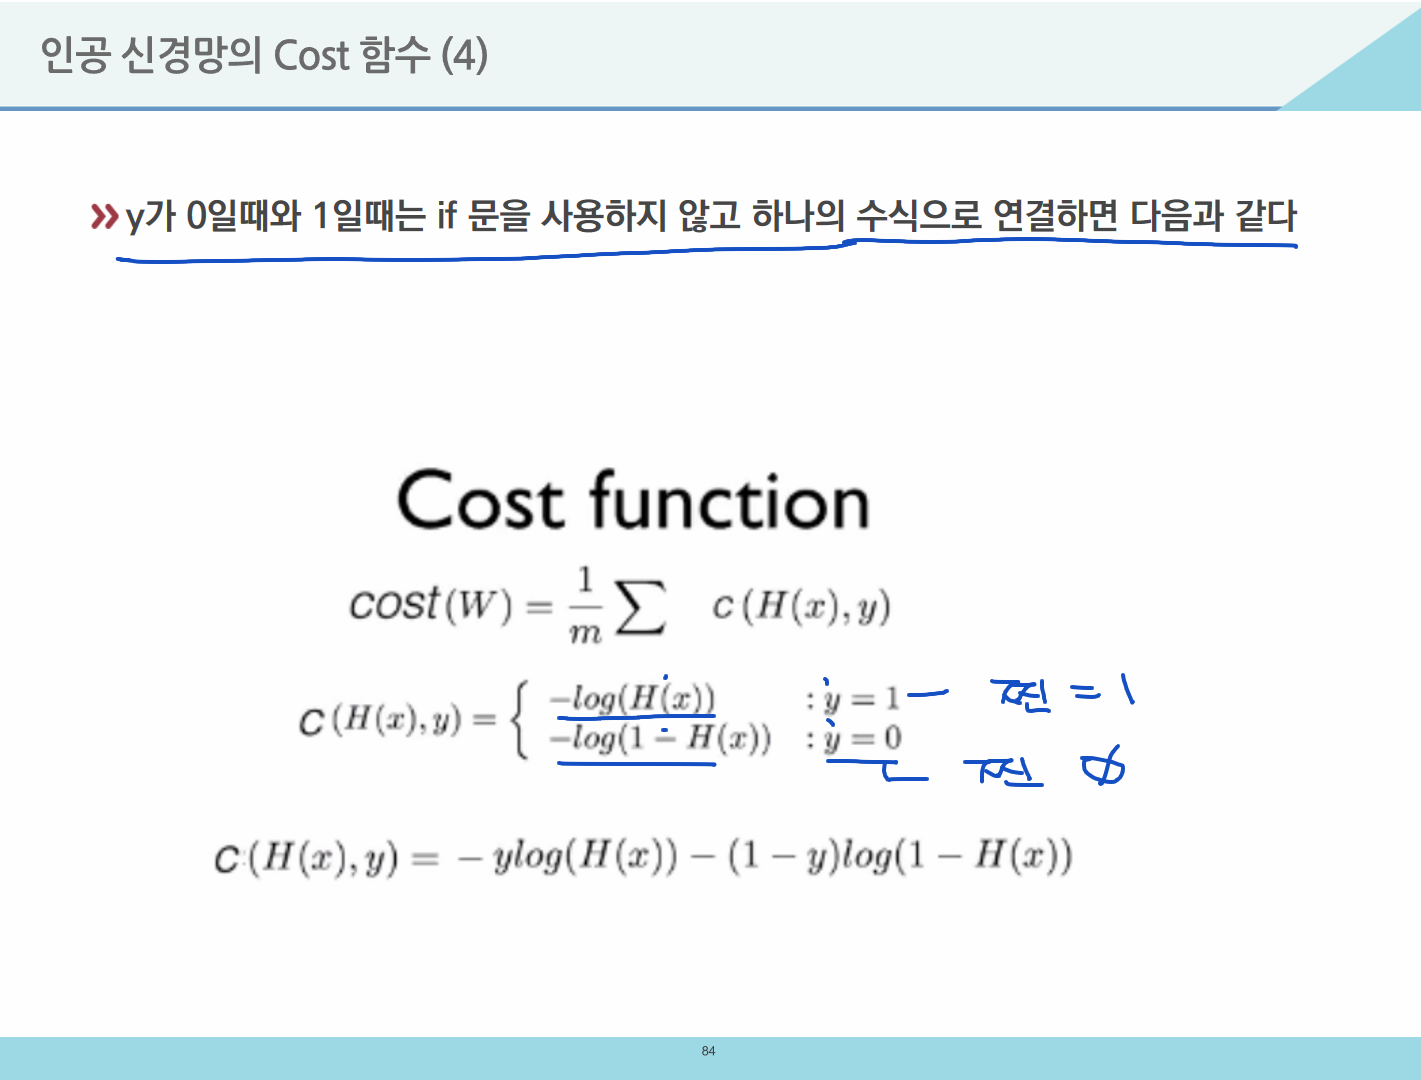

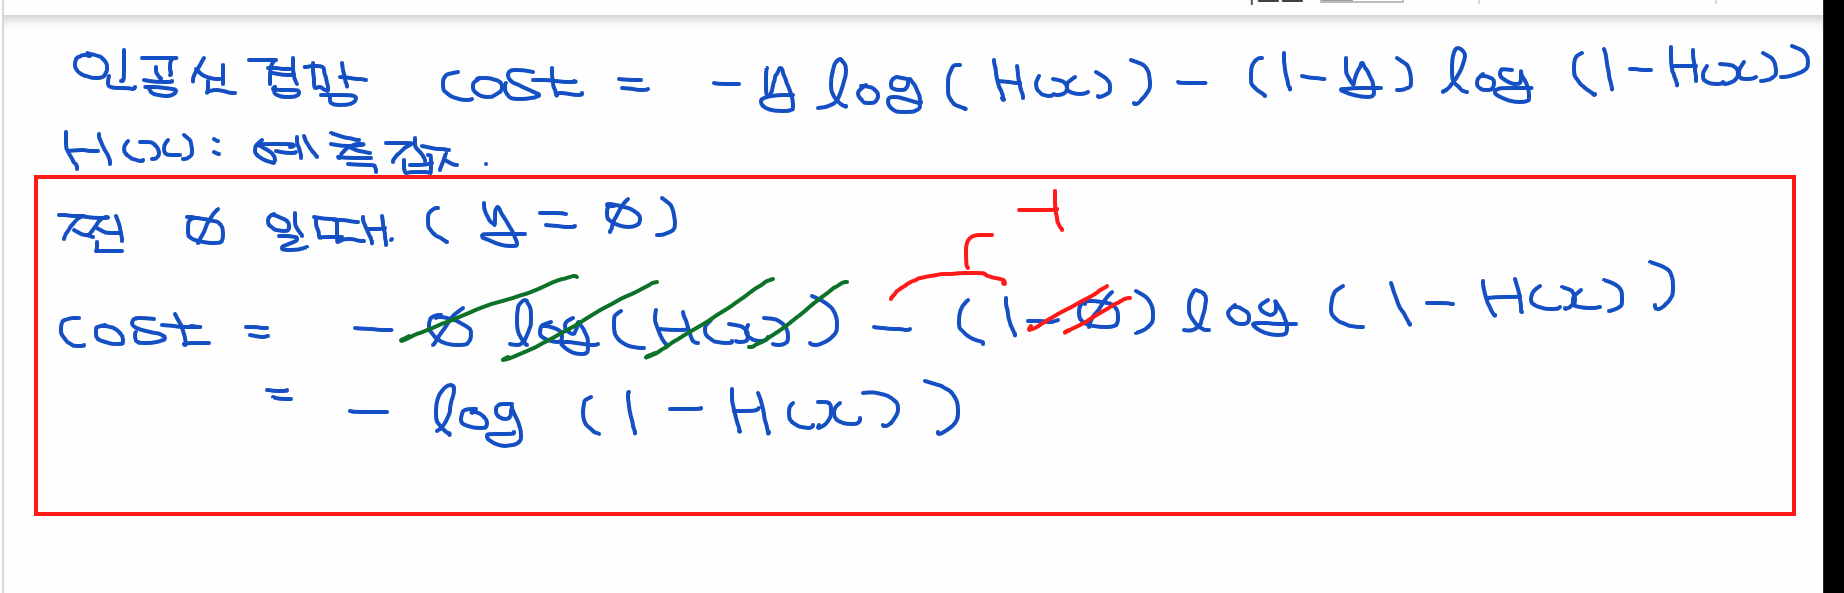

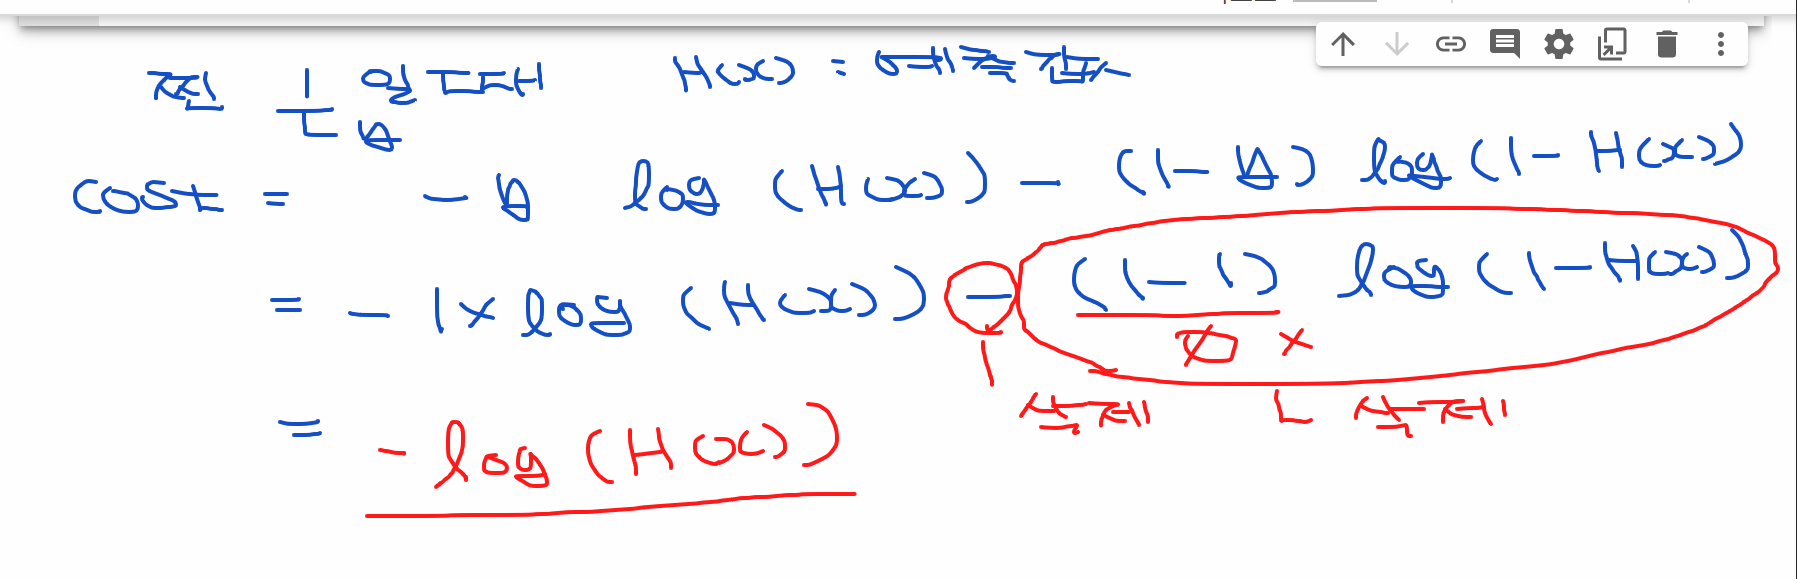

# W의 기울기

- 식 미분해서 w, b 기울기 계산해야 하는데 미분식 너무 어렵다.
 -> 나중에 텐서플로가 하라고 하고
 -> 일단은 다른 식 미분해볼 것.

In [98]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

- x1 리턴하고 싶은데 열방향 데이터를 리턴할 수 없음

In [99]:
# 줄칸 바꿈
X.T

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [100]:
x1 = X.T[0]

In [101]:
x1

array([0, 0, 1, 1])

In [104]:
hypothesis - y

array([[3],
       [5],
       [4],
       [5]])

In [107]:
np.dot( (hypothesis - y), X.T[0] )    # 차원 맞춰줘야 행렬곱 가능

ValueError: ignored

In [108]:
x1             # 1차원 배열

array([0, 0, 1, 1])

In [113]:
x1.reshape(1,4)     # 1줄 4칸인 2차원 배열로 변환

array([[0, 0, 1, 1]])

In [114]:
x1.reshape(1,-1)    # 1줄 (자동계산)칸인 배열로 변환

array([[0, 0, 1, 1]])

In [119]:
hypothesis = sigmoid(hypothesis)

In [120]:
hypothesis

array([[0.95257413],
       [0.99330715],
       [0.98201379],
       [0.99752738]])

In [125]:
np.dot( x1, ((hypothesis) - y) )

array([[0.97954117]])

In [126]:
np.dot( x1, ((hypothesis) - y) ) / 4      # w1 기울기

array([[0.24488529]])

In [127]:
w1_grad = np.dot( x1, ((hypothesis) - y) ) / 4

In [128]:
w1_grad

array([[0.24488529]])

- x2 리턴하고 싶음

In [129]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [130]:
X.T

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [131]:
X.T[1]

array([0, 1, 0, 1])

In [132]:
x2 = X.T[1]

In [133]:
x2.reshape(1,-1)

array([[0, 1, 0, 1]])

In [136]:
np.dot( x2, ((hypothesis) - y) )

array([0.99083453])

In [134]:
np.dot( x2, ((hypothesis) - y) ) / 4  

array([0.24770863])

In [139]:
w2_grad = np.dot( x2, ((hypothesis) - y) ) / 4  

In [140]:
w2_grad

array([0.24770863])

# b의 기울기

In [141]:
hypothesis - y

array([[ 0.95257413],
       [ 0.99330715],
       [ 0.98201379],
       [-0.00247262]])

In [142]:
np.sum( hypothesis - y ) / 4

0.7313556106948556

In [143]:
b_grad = np.sum( hypothesis - y ) / 4

# 반복해서 오차 제곱의 합이 0으로 수렴되는 w와 b를 찾음

In [144]:
learning_rate = 0.1

In [145]:
np.dot(X, w) + b     # 선형회귀

array([[3],
       [5],
       [4],
       [6]])

In [146]:
 sigmoid( np.dot(X, w) + b )  # 시그모이드 함수 적용하여 0~1사이 값으로 바꿔줌

array([[0.95257413],
       [0.99330715],
       [0.98201379],
       [0.99752738]])

In [147]:
hypothesis =  sigmoid( np.dot(X, w) + b )

In [148]:
hypothesis

array([[0.95257413],
       [0.99330715],
       [0.98201379],
       [0.99752738]])

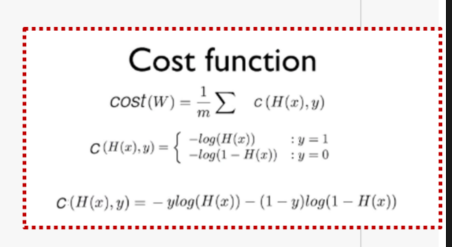

In [150]:
np.sum(-y * np.log(hypothesis) - (1-y)*np.log(1-hypothesis)) / 4

3.0189820782796057

In [151]:
-np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis)) / 4

3.0189820782796057

In [152]:
-1/4 * np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))

3.0189820782796057

In [153]:
hypothesis = sigmoid( np.dot(X, w) + b )
print("hypothesis:", hypothesis)

cost = -1/4 * np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
print("cost = ", cost)

hypothesis: [[0.95257413]
 [0.99330715]
 [0.98201379]
 [0.99752738]]
cost =  3.0189820782796057


In [159]:
for i in range(2):
  hypothesis = sigmoid( np.dot(X, w) + b )
  print("hypothesis:", hypothesis)

  cost = -1/4 * np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
  print("cost = ", cost)
  
  print("X.T[", i, "] = ", X.T[i])
  X_col_2d = X.T[i]
  print("X_col_2d = ", X_col_2d)
  print("=" * 100)

hypothesis: [[0.95257413]
 [0.99330715]
 [0.98201379]
 [0.99752738]]
cost =  3.0189820782796057
X.T[ 0 ] =  [0 0 1 1]
X_col_2d =  [0 0 1 1]
hypothesis: [[0.95257413]
 [0.99330715]
 [0.98201379]
 [0.99752738]]
cost =  3.0189820782796057
X.T[ 1 ] =  [0 1 0 1]
X_col_2d =  [0 1 0 1]


# w1, w2의 기울기 계산

In [166]:
w = np.array(
    [
      [1.0],
      [2.0]
    ]
)

In [167]:
w

array([[1.],
       [2.]])

In [168]:
b = np.array(
    [
      [3.0]
    ]
)

In [169]:
b

array([[3.]])

In [171]:
for i in range(2):
  hypothesis = sigmoid( np.dot(X, w) + b )
  print("hypothesis:", hypothesis)

  cost = -1/4 * np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
  print("cost = ", cost)
  
  print("X.T[", i, "] = ", X.T[i])
  X_col_2d = X.T[i]
  print("X_col_2d = ", X_col_2d)

  w_grad = np.dot(X_col_2d, (hypothesis-y)) / 4
  print("w_grad =", w_grad)
  b_grad = np.sum(hypothesis - y) / 4
  print("b_grad =", b_grad)

  print("w[", i, "] 수정 전 = " , w[i])
  w[i] = w[i] - learning_rate * w_grad
  print("w[", i, "] 수정 후 = " , w[i])
  print("b 수정 전 = ", b)
  b = b - learning_rate * b_grad
  print("b 수정 후 = ", b)
  print("=" * 100)

hypothesis: [[0.95257413]
 [0.99314045]
 [0.98157611]
 [0.99740286]]
cost =  3.006852228655963
X.T[ 0 ] =  [0 0 1 1]
X_col_2d =  [0 0 1 1]
w_grad = [0.24474474]
b_grad = 0.7311733867399322
w[ 0 ] 수정 전 =  [0.97551147]
w[ 0 ] 수정 후 =  [0.951037]
b 수정 전 =  [[3.]]
b 수정 후 =  [[2.92688266]]
hypothesis: [[0.94915946]
 [0.99262395]
 [0.97972572]
 [0.99713738]]
cost =  2.9474617137893384
X.T[ 1 ] =  [0 1 0 1]
X_col_2d =  [0 1 0 1]
w_grad = [0.24744033]
b_grad = 0.7296616257066155
w[ 1 ] 수정 전 =  [1.97523067]
w[ 1 ] 수정 후 =  [1.95048663]
b 수정 전 =  [[2.92688266]]
b 수정 후 =  [[2.8539165]]


In [172]:
for j in range(1000):  
  for i in range(2):
    hypothesis = sigmoid( np.dot(X, w) + b )
    print("hypothesis:", hypothesis)

    cost = -1/4 * np.sum(y * np.log(hypothesis) + (1-y)*np.log(1-hypothesis))
    print("cost = ", cost)
    
    print("X.T[", i, "] = ", X.T[i])
    X_col_2d = X.T[i]
    print("X_col_2d = ", X_col_2d)

    w_grad = np.dot(X_col_2d, (hypothesis-y)) / 4
    print("w_grad =", w_grad)
    b_grad = np.sum(hypothesis - y) / 4
    print("b_grad =", b_grad)

    print("w[", i, "] 수정 전 = " , w[i])
    w[i] = w[i] - learning_rate * w_grad
    print("w[", i, "] 수정 후 = " , w[i])
    print("b 수정 전 = ", b)
    b = b - learning_rate * b_grad
    print("b 수정 후 = ", b)
    print("=" * 100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
b 수정 후 =  [[-5.21466179]]
hypothesis: [[0.00540688]
 [0.12961916]
 [0.12484585]
 [0.79624867]]
cost =  0.12636123607095423
X.T[ 1 ] =  [0 1 0 1]
X_col_2d =  [0 1 0 1]
w_grad = [-0.01853304]
b_grad = 0.014030137200025994
w[ 1 ] 수정 전 =  [3.31033151]
w[ 1 ] 수정 후 =  [3.31218482]
b 수정 전 =  [[-5.21466179]]
b 수정 후 =  [[-5.2160648]]
hypothesis: [[0.00539934]
 [0.12966997]
 [0.12469264]
 [0.79632171]]
cost =  0.1263072393907549
X.T[ 0 ] =  [0 0 1 1]
X_col_2d =  [0 0 1 1]
w_grad = [-0.01974641]
b_grad = 0.014020912685601059
w[ 0 ] 수정 전 =  [3.2673415]
w[ 0 ] 수정 후 =  [3.26931614]
b 수정 전 =  [[-5.2160648]]
b 수정 후 =  [[-5.21746689]]
hypothesis: [[0.00539181]
 [0.12951181]
 [0.12475514]
 [0.79641456]]
cost =  0.12624862886637253
X.T[ 1 ] =  [0 1 0 1]
X_col_2d =  [0 1 0 1]
w_grad = [-0.01851841]
b_grad = 0.014018331711090293
w[ 1 ] 수정 전 =  [3.31218482]
w[ 1 ] 수정 후 =  [3.31403666]
b 수정 전 =  [[-5.21746689]]
b 수정 후 =  [[-5.21886873]]
hypothesis: [[0.0053843 ]
 [0.129562

In [173]:
w

array([[3.59226031],
       [3.62057104]])

In [174]:
b

array([[-5.68129743]])

In [175]:
np.dot(X, w) + b

array([[-5.68129743],
       [-2.0607264 ],
       [-2.08903712],
       [ 1.53153392]])

In [177]:
sigmoid(np.dot(X, w) + b)

array([[0.00339755],
       [0.11297302],
       [0.11016693],
       [0.82223063]])

In [180]:
predict = sigmoid(np.dot(X, w) + b)
predict

array([[0.00339755],
       [0.11297302],
       [0.11016693],
       [0.82223063]])

In [178]:
y

array([[0],
       [0],
       [0],
       [1]])

In [181]:
# np.where(조건, 조건만족시 리턴할 값, 조건 거짓일때 리턴할 값)
# np.where(predict>0.5, 1, 0) : predict에 저장된 값이 0.5 초과면 1리턴 아니면 0 리턴

predict01 = np.where(predict>=0.5, 1, 0)
predict01

array([[0],
       [0],
       [0],
       [1]])

In [182]:
predict02 = (predict01 == y)
predict02

array([[ True],
       [ True],
       [ True],
       [ True]])

In [183]:
np.sum(predict02)

4

In [184]:
# 정확도 계산
acc = np.sum(predict02) / 4
acc

1.0